Step - 1  - Problem Statement

The data scientists at BigMart have collected sales data for 1559 products across 10 stores in different cities for the year 2013. Now each product has certain attributes that sets it apart from other products. Same is the case with each store.
The aim is to build a predictive model to find out the sales of each product at a particular store so that it would help the decision makers at BigMart to find out the properties of any product or store, which play a key role in increasing the overall sales


We have train (8523) and test (5681) data set, train data set has both input and output variable(s). We need to predict the sales for test data set.

Step - 2  - Data Collection

In [84]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Importing the data

In [86]:
train = pd.read_csv("/content/Train.csv")

test=pd.read_csv("/content/Test.csv")

In [88]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [89]:
train.shape

(8523, 12)

In [90]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [92]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [91]:
test.shape

(5681, 11)

In [93]:
test.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

Step - 3  - Data Preprocessing

In [94]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [95]:
# check for missing values
train.isnull().sum()

,0
Item_Identifier,0
Item_Weight,1463
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,2410
Outlet_Location_Type,0


In [97]:
# check for duplicated values
sum(train.duplicated())

0

Treatment of missing values for Item_Weight & Outlet_Size

Categoral data can be filled with mode

Numerical data can be filled with mean

In [98]:
train['Item_Weight'].fillna(train['Item_Weight'].mean(), inplace=True)

<ipython-input-98-be6f6123ea1b>:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [99]:
train.isnull().sum()

,0
Item_Identifier,0
Item_Weight,0
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,2410
Outlet_Location_Type,0


In [100]:
train['Outlet_Size']= train['Outlet_Size'].fillna(train['Outlet_Size'].mode()[0])

In [101]:
train.isnull().sum()

,0
Item_Identifier,0
Item_Weight,0
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,0
Outlet_Location_Type,0


Data correction for Item_Fat_Content

In [102]:
train.Item_Fat_Content.value_counts()

,count
Item_Fat_Content,
Low Fat,5089
Regular,2889
LF,316
reg,117
low fat,112


In [103]:
train.replace({'Item_Fat_Content':{'LF':'Low Fat', 'low fat':'Low Fat', 'reg':'Regular'}}, inplace=True)

In [104]:
train.Item_Fat_Content.value_counts()

,count
Item_Fat_Content,
Low Fat,5517
Regular,3006


Step - 4  - Exploratory Data Analysis (EDA)

1. Univariate Exploration
2. Bivariate Exploration

Univariate Exploration

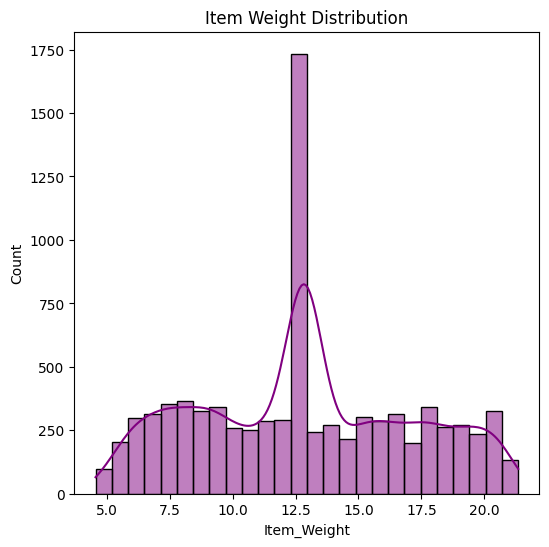

In [106]:
# Distribution of Item Weight

plt.figure(figsize=(6,6))
plt.title("Item Weight Distribution")
sns.histplot(data=train, x='Item_Weight', kde=True, color = 'purple')
plt.show()

From the above plot we can observe that a lot of items have a weight of 12.5

Item_Fat_Content
Low Fat    5517
Regular    3006
Name: count, dtype: int64


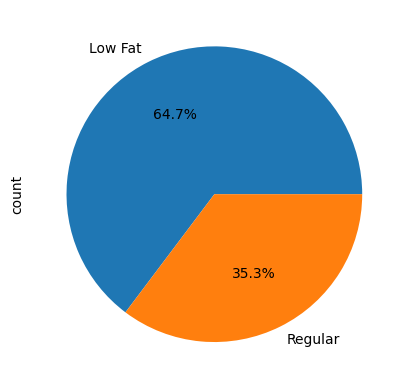

In [107]:
train['Item_Fat_Content'].value_counts().plot(kind='pie',autopct='%1.1f%%')
print(train['Item_Fat_Content'].value_counts())

we can see that we have more items from low fat category rather than regular

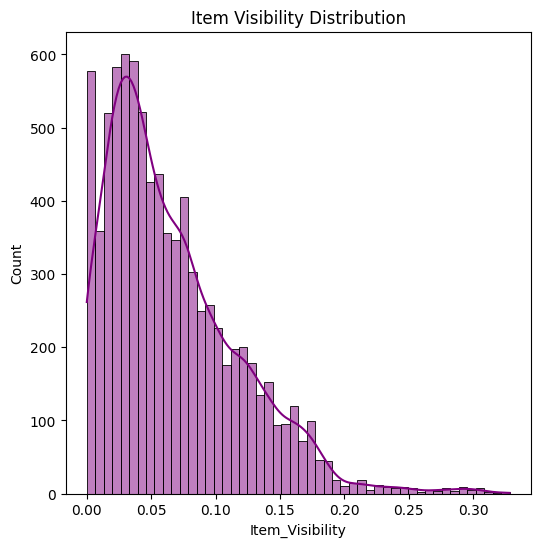

In [109]:
# Distribution of Item Visibility

plt.figure(figsize=(6,6))
plt.title("Item Visibility Distribution")
sns.histplot(data=train, x='Item_Visibility', kde=True,color = 'purple')
plt.show()

From the plot it is evident that majority of the items have visibility less than 0.20


In [110]:
#Distribution of Item Type

item_type_content_table = train.groupby('Item_Type').agg({'Item_Identifier':'count'})

item_type_content_table['perc'] = (item_type_content_table['Item_Identifier']/item_type_content_table['Item_Identifier'].sum())*100

item_type_content_table

,Item_Identifier,perc
Item_Type,,
Baking Goods,648,7.602957
Breads,251,2.944972
Breakfast,110,1.290625
Canned,649,7.614690
Dairy,682,8.001877
Frozen Foods,856,10.043412
Fruits and Vegetables,1232,14.455004
Hard Drinks,214,2.510853
Health and Hygiene,520,6.101138


<ipython-input-115-06e22def3fb8>:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




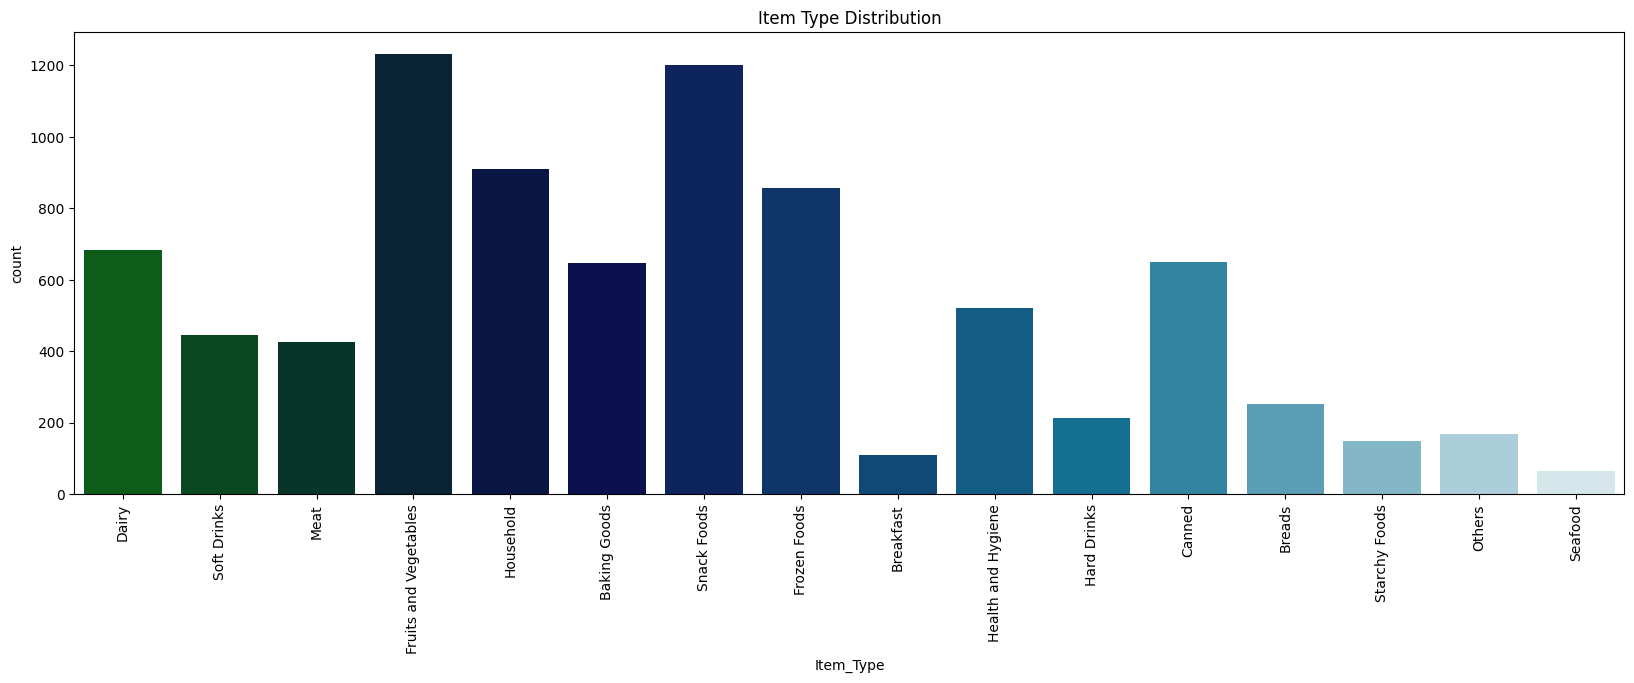

In [115]:
plt.figure(figsize=(20,6))
plt.title("Item Type Distribution")
plt.xticks(rotation=90) # Changed sns.x_ticks to plt.xticks
sns.countplot(data=train, x='Item_Type',palette='ocean')
plt.show()

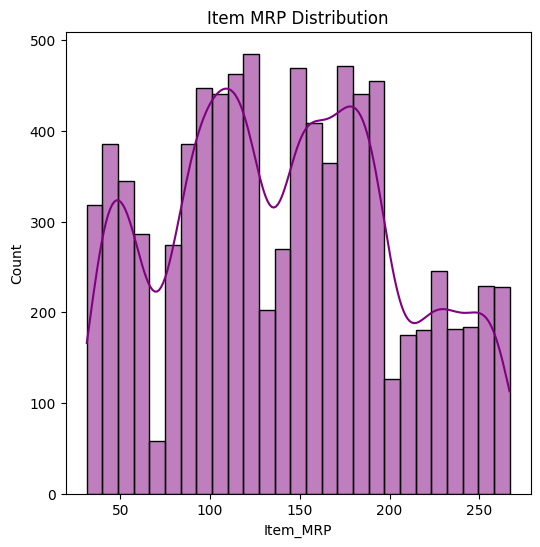

In [116]:
# Distribution of Item MRP

plt.figure(figsize=(6,6))
plt.title("Item MRP Distribution")
sns.histplot(data=train, x='Item_MRP', kde=True, color = 'purple')
plt.show()

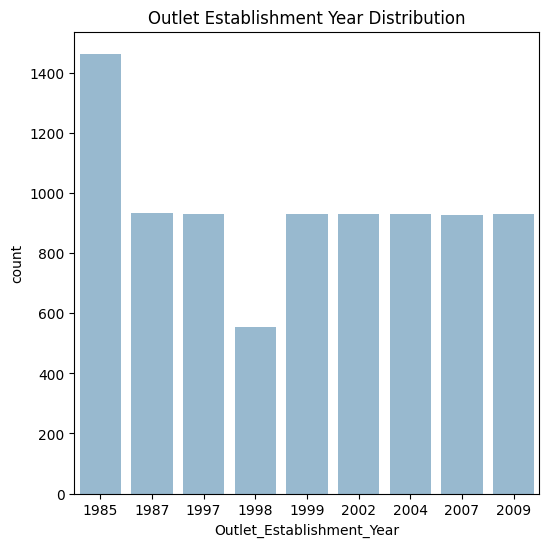

In [117]:
# Distribution of Outlet Establishment Year

plt.figure(figsize=(6,6))
plt.title("Outlet Establishment Year Distribution")
sns.countplot(data=train, x='Outlet_Establishment_Year',alpha=0.5)
plt.show()

More than 1400 outlet were established in 1985

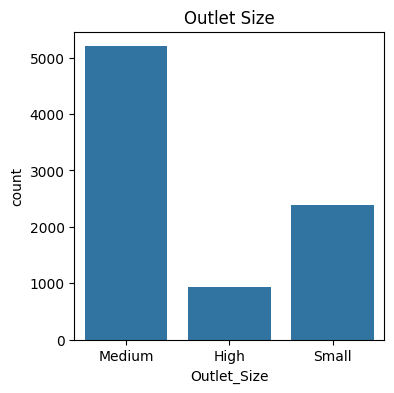

In [119]:
#Distribution of Outlet Size

plt.figure(figsize=(4,4))
plt.title("Outlet Size")
sns.countplot(data=train, x='Outlet_Size')
plt.show()

Majority of Outlets are of medium size

<ipython-input-121-a9256ea15a5c>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




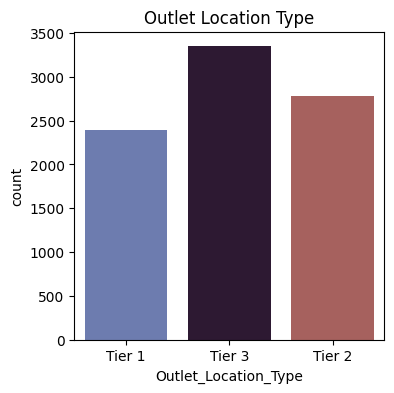

In [121]:
# Distribution of Outlet Location Type

plt.figure(figsize=(4,4))
plt.title("Outlet Location Type")
sns.countplot(data=train, x='Outlet_Location_Type',palette='twilight')
plt.show()

Major outlets are in Tier 3 locactions followed by Tier 2 and Tier 1

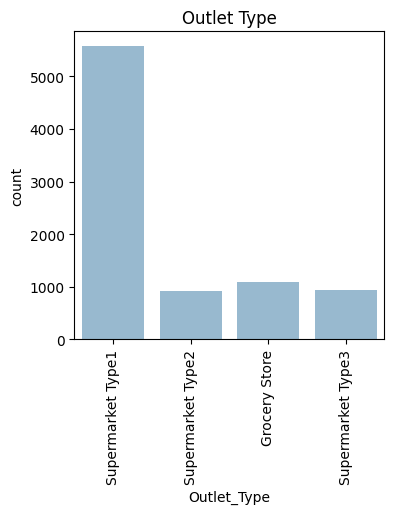

In [124]:
#Distribution of Outlet Type

plt.figure(figsize=(4,4))
plt.title("Outlet Type")
plt.xticks(rotation=90)
sns.countplot(data=train, x='Outlet_Type',alpha=0.5)
plt.show()

Majority Outlets belong to Supermarket Type 1

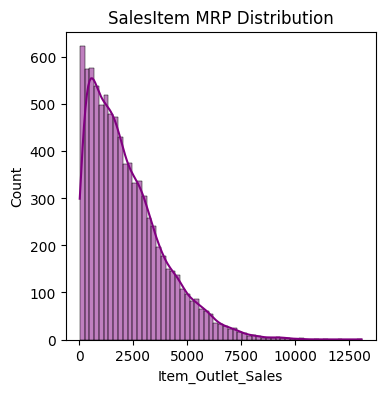

In [126]:
# Sales Distribution

plt.figure(figsize=(4,4))
plt.title("SalesItem MRP Distribution")
sns.histplot(data=train, x='Item_Outlet_Sales', kde=True,color='purple')
plt.show()

Bivariate Exploration

<ipython-input-129-324533e4ad5f>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




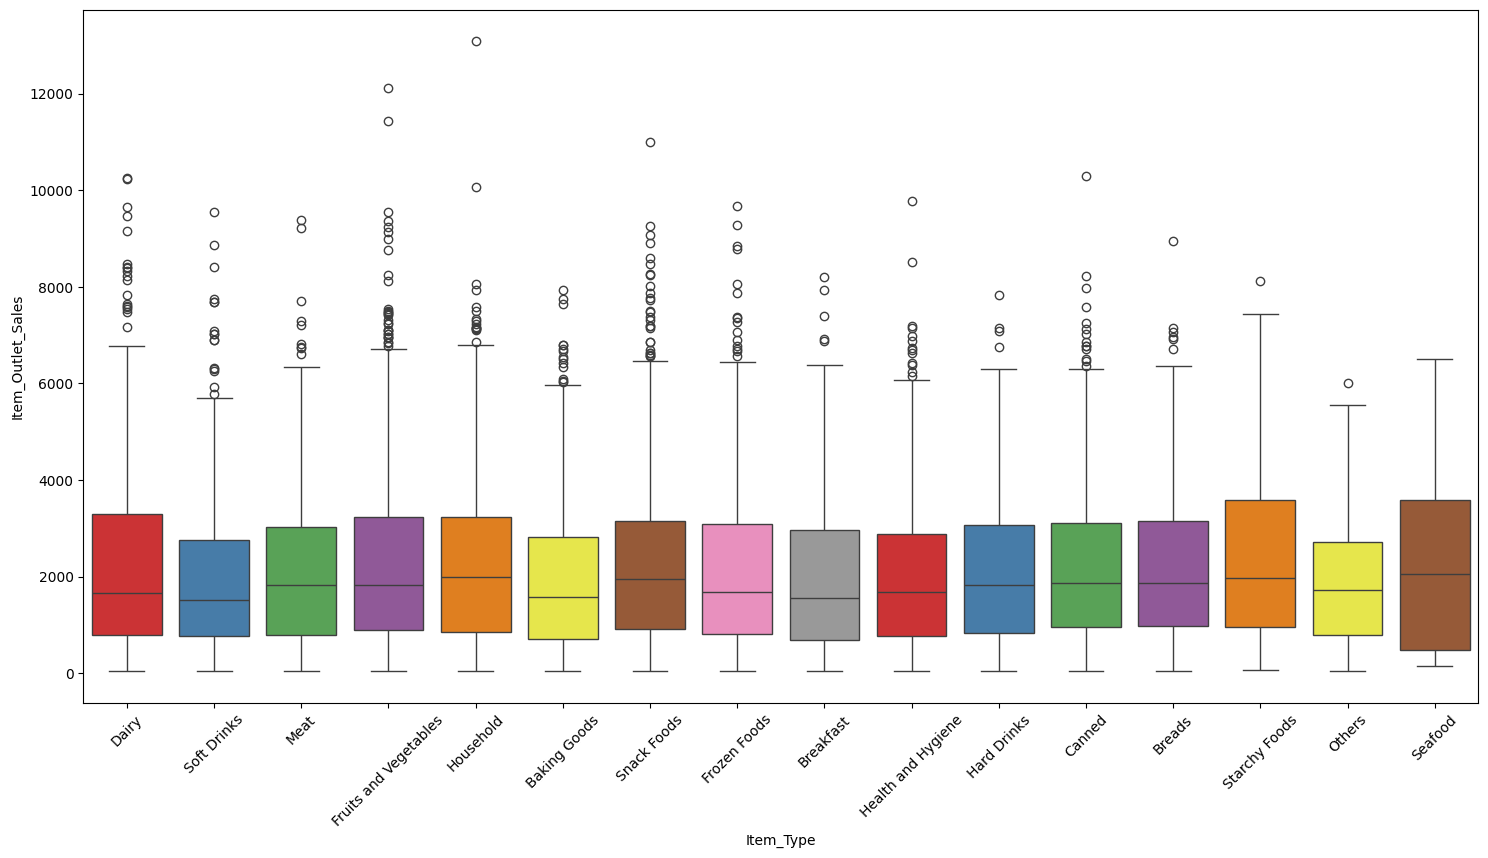

In [129]:
plt.figure(figsize = (18,9))
ax=sns.boxplot(x='Item_Type', y='Item_Outlet_Sales', data=train, palette="Set1")
plt.setp(ax.get_xticklabels(), rotation=45)
plt.show()

In [130]:
#Get the first two characters of ID:

train['Item_Type_Combined'] = train['Item_Identifier'].apply(lambda x: x[0:2])

#Rename them to more intuitive categories:
train['Item_Type_Combined'] = train['Item_Type_Combined'].map({'FD':'Food',
                                                             'NC':'Non-Consumable',
                                                             'DR':'Drinks'})
train['Item_Type_Combined'].value_counts()

,count
Item_Type_Combined,
Food,6125
Non-Consumable,1599
Drinks,799


<ipython-input-131-2ab534a0e34b>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




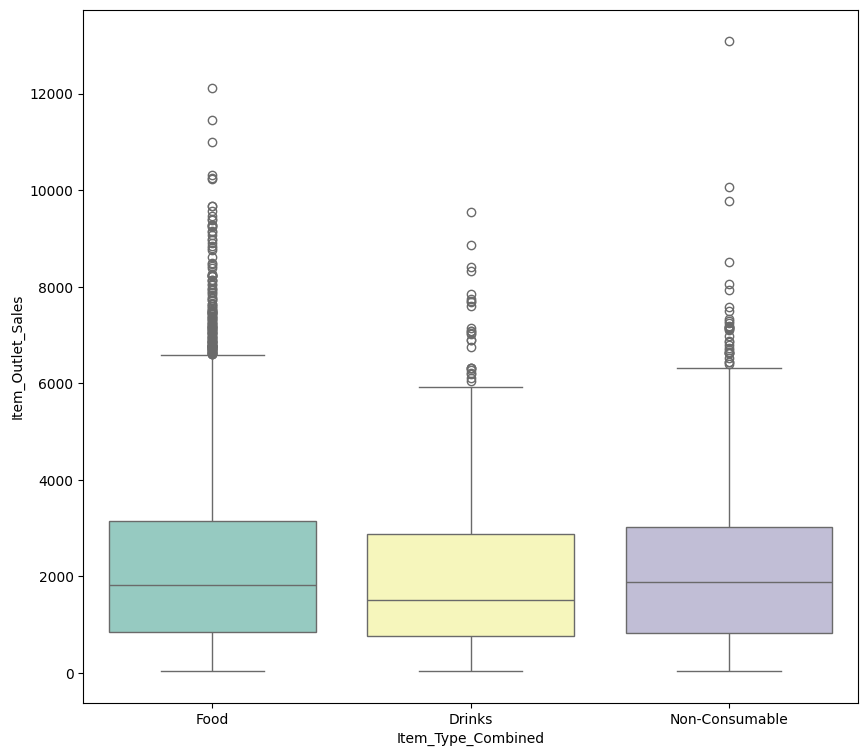

In [131]:
plt.figure(figsize = (10,9))

sns.boxplot(x='Item_Type_Combined', y='Item_Outlet_Sales', data=train, palette="Set3")

plt.show()

<ipython-input-132-2e8992049299>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




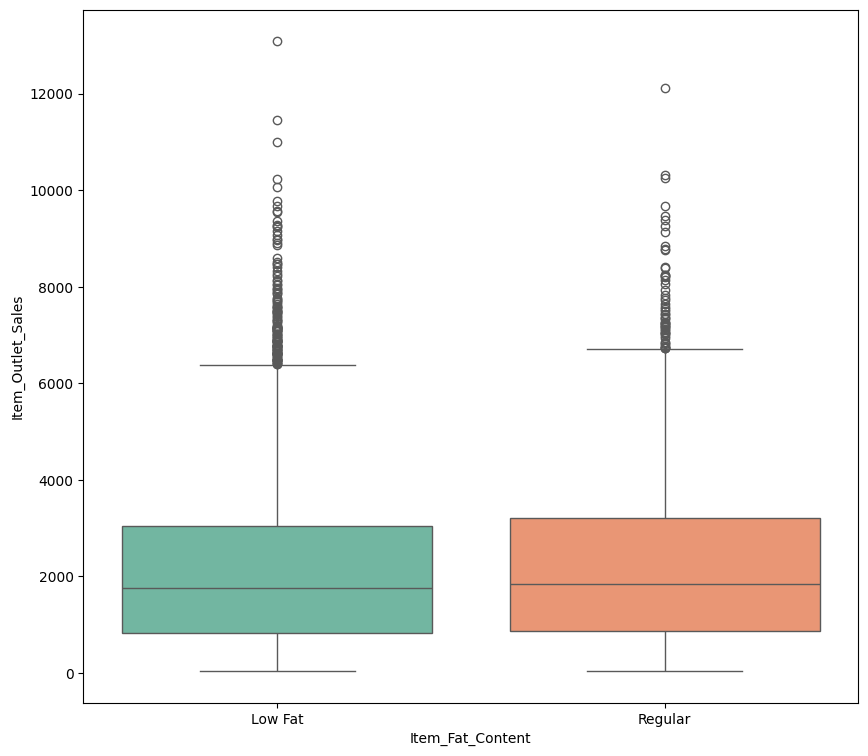

In [132]:
plt.figure(figsize = (10,9))
sns.boxplot(x='Item_Fat_Content', y='Item_Outlet_Sales', data=train, palette="Set2")
plt.show()

<ipython-input-134-64a1b0a24038>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




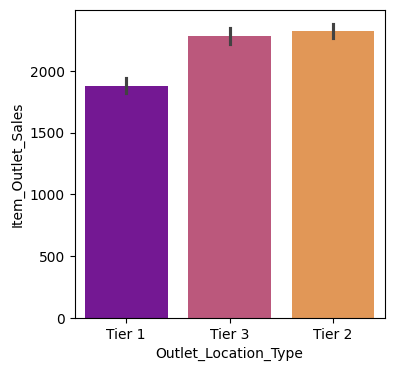

In [134]:
plt.figure(figsize=(4,4))
sns.barplot(data=train, x = 'Outlet_Location_Type', y='Item_Outlet_Sales',palette='plasma')
plt.show()

<ipython-input-135-68fe53d267c5>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




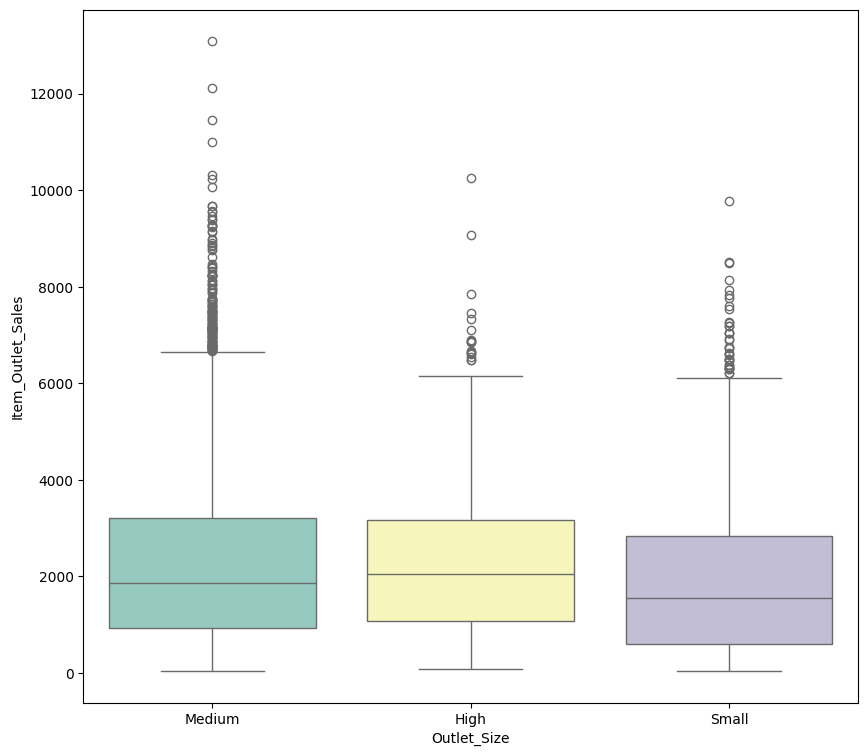

In [135]:
plt.figure(figsize = (10,9))

sns.boxplot(x='Outlet_Size', y='Item_Outlet_Sales', data=train, palette="Set3")

plt.show()

In [136]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Type_Combined
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,Food
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,Drinks
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,Food
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,Food
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,Non-Consumable


In [137]:
train.shape

(8523, 13)

Step - 5  - Feature Engineering

Encoding ( label encoding - one hot encoding)

In [140]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
import warnings
from xgboost import XGBRegressor

In [142]:
for i in train.columns:
    if train[i].dtype=='object':
            label_encoder=LabelEncoder()
            train[i]=label_encoder.fit_transform(train[i])

<ipython-input-147-c4c168ac9ee6>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




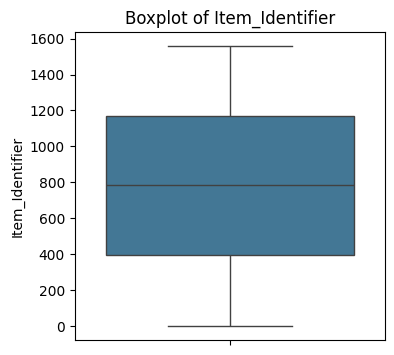

<ipython-input-147-c4c168ac9ee6>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




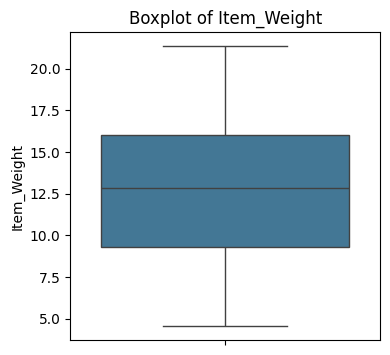

<ipython-input-147-c4c168ac9ee6>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




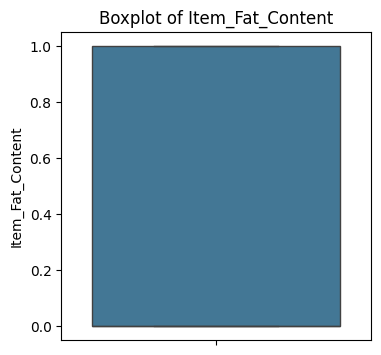

<ipython-input-147-c4c168ac9ee6>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




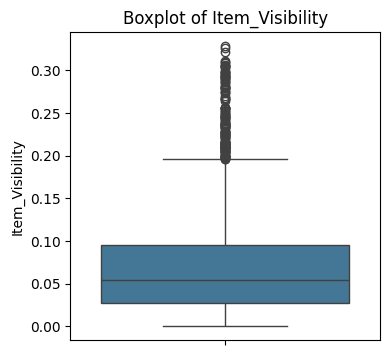

<ipython-input-147-c4c168ac9ee6>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




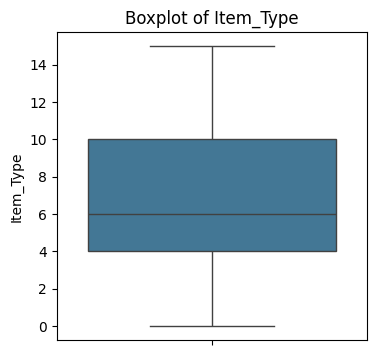

<ipython-input-147-c4c168ac9ee6>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




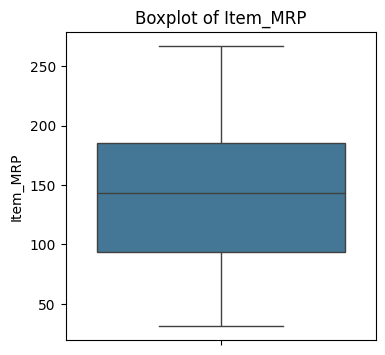

<ipython-input-147-c4c168ac9ee6>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




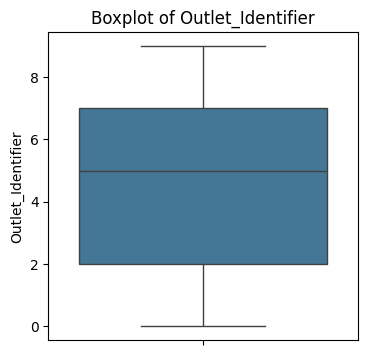

<ipython-input-147-c4c168ac9ee6>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




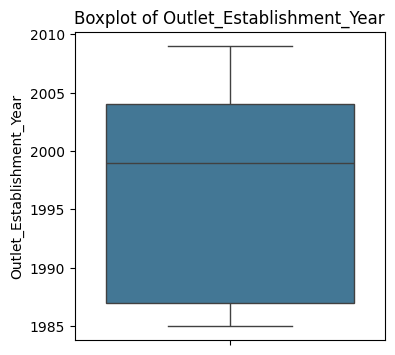

<ipython-input-147-c4c168ac9ee6>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




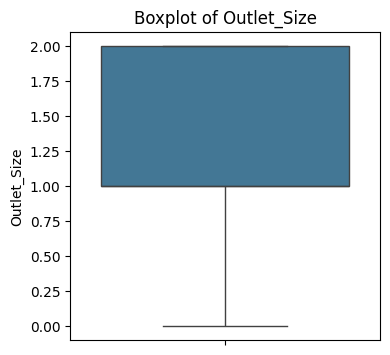

<ipython-input-147-c4c168ac9ee6>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




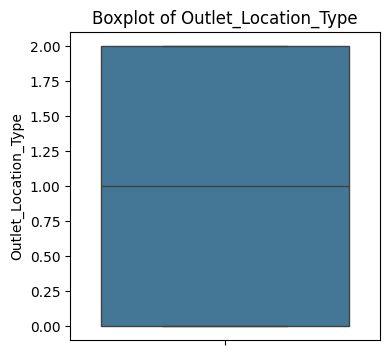

<ipython-input-147-c4c168ac9ee6>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




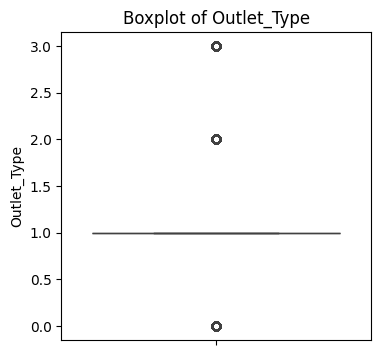

<ipython-input-147-c4c168ac9ee6>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




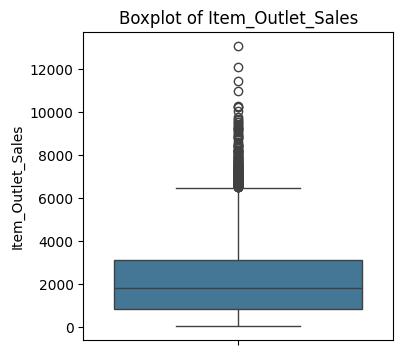

<ipython-input-147-c4c168ac9ee6>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




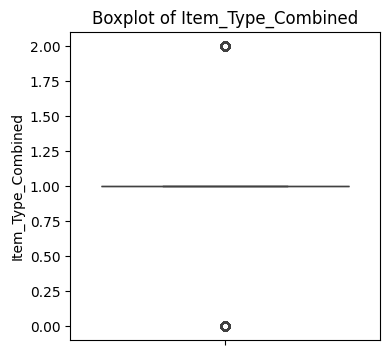

In [147]:
for col in train.select_dtypes(include='number').columns:
    plt.figure(figsize=(4, 4))
    sns.boxplot(y=train[col], palette='mako')
    plt.title(f'Boxplot of {col}')
    plt.show()

In [148]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   int64  
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   int64  
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   int64  
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   int64  
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   int64  
 9   Outlet_Location_Type       8523 non-null   int64  
 10  Outlet_Type                8523 non-null   int64  
 11  Item_Outlet_Sales          8523 non-null   float64
 12  Item_Type_Combined         8523 non-null   int64  
dtypes: float64(4), int64(9)
memory usage: 865.7 KB


In [149]:
train

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Type_Combined
0,156,9.300,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380,1
1,8,5.920,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228,0
2,662,17.500,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700,1
3,1121,19.200,1,0.000000,6,182.0950,0,1998,1,2,0,732.3800,1
4,1297,8.930,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,370,6.865,0,0.056783,13,214.5218,1,1987,0,2,1,2778.3834,1
8519,897,8.380,1,0.046982,0,108.1570,7,2002,1,1,1,549.2850,1
8520,1357,10.600,0,0.035186,8,85.1224,6,2004,2,1,1,1193.1136,2
8521,681,7.210,1,0.145221,13,103.1332,3,2009,1,2,2,1845.5976,1


In [150]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Type_Combined
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380,1
1,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228,0
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700,1
3,1121,19.20,1,0.000000,6,182.0950,0,1998,1,2,0,732.3800,1
4,1297,8.93,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052,2


In [152]:
a = pd.get_dummies(train[['Item_Type','Outlet_Identifier','Outlet_Type']])
train = train.drop(['Item_Type','Outlet_Identifier','Outlet_Type',],axis = 1 )
train = pd.concat([train,a],axis = 1)

In [153]:
train

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales,Item_Type_Combined,Item_Type,Outlet_Identifier,Outlet_Type
0,156,9.300,0,0.016047,249.8092,1999,1,0,3735.1380,1,4,9,1
1,8,5.920,1,0.019278,48.2692,2009,1,2,443.4228,0,14,3,2
2,662,17.500,0,0.016760,141.6180,1999,1,0,2097.2700,1,10,9,1
3,1121,19.200,1,0.000000,182.0950,1998,1,2,732.3800,1,6,0,0
4,1297,8.930,0,0.000000,53.8614,1987,0,2,994.7052,2,9,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,370,6.865,0,0.056783,214.5218,1987,0,2,2778.3834,1,13,1,1
8519,897,8.380,1,0.046982,108.1570,2002,1,1,549.2850,1,0,7,1
8520,1357,10.600,0,0.035186,85.1224,2004,2,1,1193.1136,2,8,6,1
8521,681,7.210,1,0.145221,103.1332,2009,1,2,1845.5976,1,13,3,2


Removing Outliers

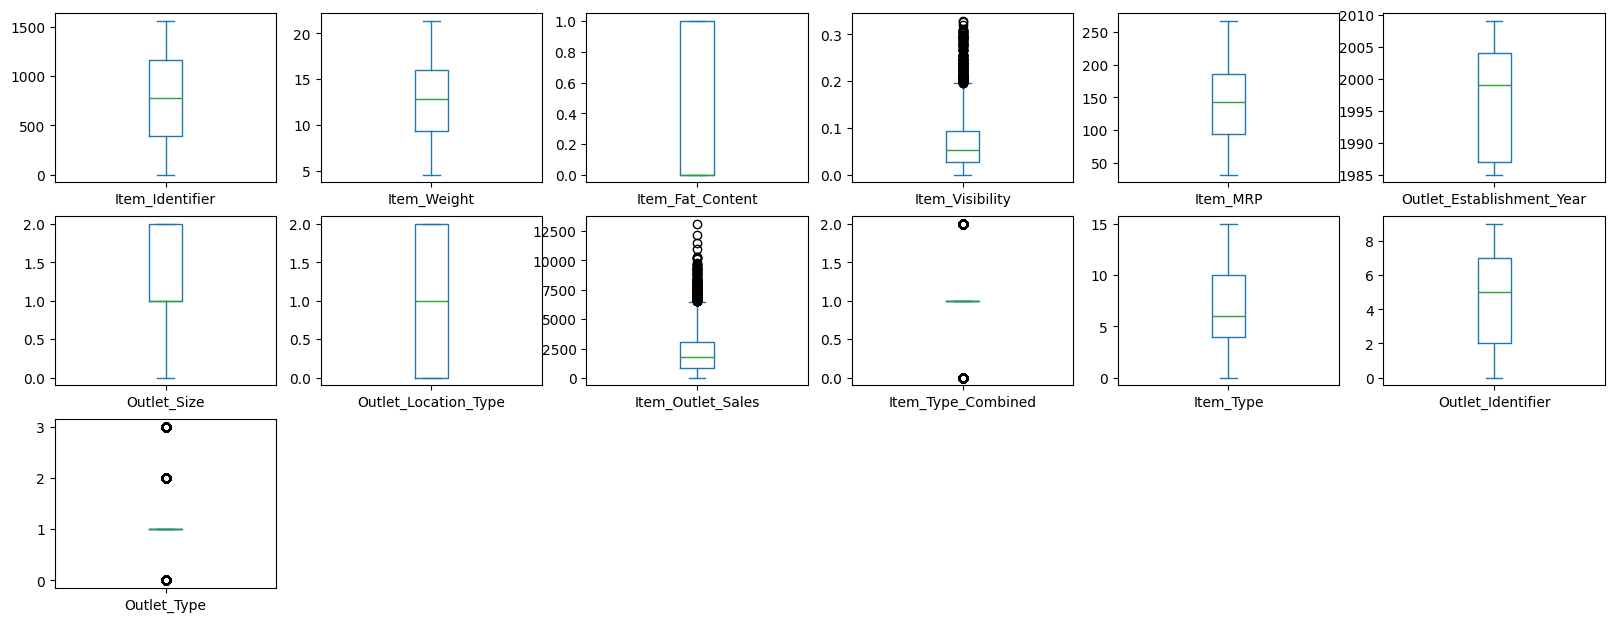

In [154]:
train.plot(kind = "box" , subplots = True , layout= (7,6), figsize =(20,18) )
plt.show()

<Figure size 400x400 with 0 Axes>

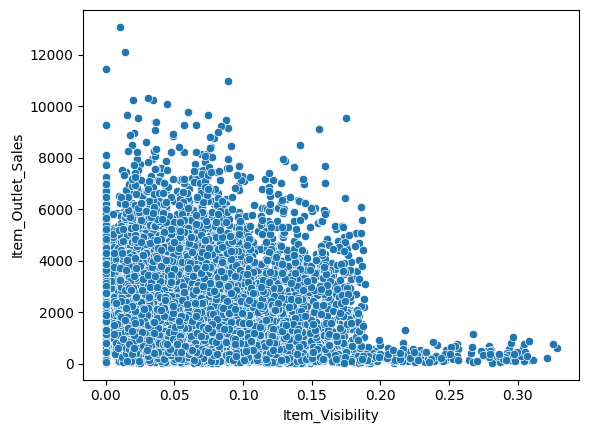

<Figure size 400x400 with 0 Axes>

In [157]:
sns.scatterplot(x=train['Item_Visibility'],y=train['Item_Outlet_Sales'])
plt.figure(figsize=(4,4))

In [158]:
train

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales,Item_Type_Combined,Item_Type,Outlet_Identifier,Outlet_Type
0,156,9.300,0,0.016047,249.8092,1999,1,0,3735.1380,1,4,9,1
1,8,5.920,1,0.019278,48.2692,2009,1,2,443.4228,0,14,3,2
2,662,17.500,0,0.016760,141.6180,1999,1,0,2097.2700,1,10,9,1
3,1121,19.200,1,0.000000,182.0950,1998,1,2,732.3800,1,6,0,0
4,1297,8.930,0,0.000000,53.8614,1987,0,2,994.7052,2,9,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,370,6.865,0,0.056783,214.5218,1987,0,2,2778.3834,1,13,1,1
8519,897,8.380,1,0.046982,108.1570,2002,1,1,549.2850,1,0,7,1
8520,1357,10.600,0,0.035186,85.1224,2004,2,1,1193.1136,2,8,6,1
8521,681,7.210,1,0.145221,103.1332,2009,1,2,1845.5976,1,13,3,2


Correlation

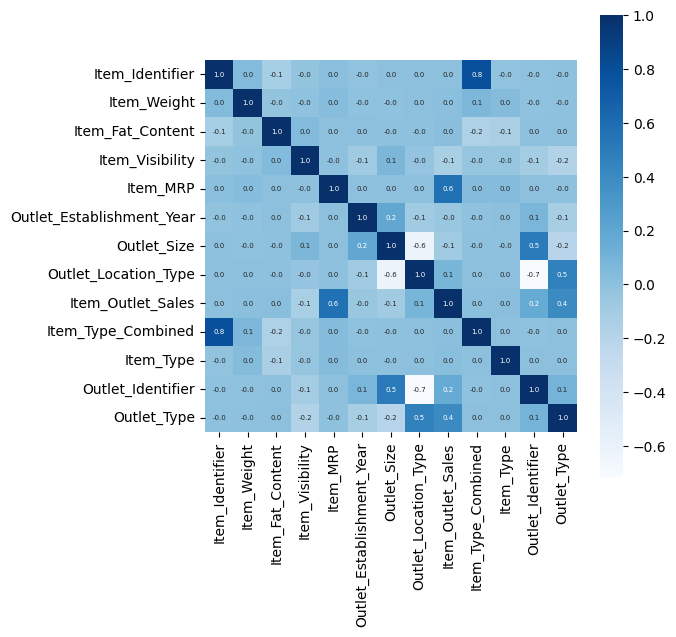

In [160]:
plt.figure(figsize=(6,6))
correlation =train.corr()
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':5}, cmap='Blues')
plt.show()

Dropping Item_Identifier, Outlet_Establishment_Year

In [167]:
train.drop(columns=['Item_Identifier', 'Outlet_Establishment_Year'], axis=1, inplace=True)

In [168]:
train.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales,Item_Type_Combined,Item_Type,Outlet_Identifier,Outlet_Type
0,9.30,0,0.016047,249.8092,1,0,3735.1380,1,4,9,1
1,5.92,1,0.019278,48.2692,1,2,443.4228,0,14,3,2
2,17.50,0,0.016760,141.6180,1,0,2097.2700,1,10,9,1
3,19.20,1,0.000000,182.0950,1,2,732.3800,1,6,0,0
4,8.93,0,0.000000,53.8614,0,2,994.7052,2,9,1,1


In [169]:
train.shape

(8523, 11)

Step - 6  -  Data Splitting

In [170]:
# splitting data to features and target
X = train.drop(columns='Item_Outlet_Sales', axis=1)
Y = train['Item_Outlet_Sales']

Scaling

In [171]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=3)

print(X.shape, X_train.shape, X_test.shape)

(8523, 10) (5966, 10) (2557, 10)


Step - 7  -  Model Selection and Training

XGboost

In [176]:
model = XGBRegressor()
model.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [174]:
model.score(X_train ,Y_train)

0.8781803628846939

In [175]:
model.score(X_test , Y_test)

0.5348711675401329

lasso

In [177]:
ls = Lasso(alpha = 0.01)
ls.fit(X_train,Y_train)

Lasso(alpha=0.01)

In [178]:
ls.score(X_train ,Y_train)

0.5057288816351571

In [179]:
ls.score(X_test,Y_test)

0.5206177136006177

Random Forest

In [180]:
forest_model = RandomForestRegressor(random_state=3)
forest_model.fit(X_train, Y_train)

RandomForestRegressor(random_state=3)

In [183]:
forest_model.score(X_train ,Y_train)

0.937112571962091

In [184]:
forest_model.score(X_test ,Y_test)

0.5665434581382365

Evaluation of model

XGBRegressor

In [186]:
# prediction for training data
xgb_training_predictions = model.predict(X_train)

# prediction for test data
xgb_test_predictions = model.predict(X_test)

In [187]:
#evaluation on training
print(f"R2 Score: {round(r2_score(Y_train, xgb_training_predictions), 2)}")
print(f"MSE: {round(mean_squared_error(Y_train, xgb_training_predictions), 2)}")
print(f"MAE: {round(mean_absolute_error(Y_train, xgb_training_predictions), 2)}")

R2 Score: 0.88
MSE: 354645.82
MAE: 429.54


visualizing the true values and prediction values

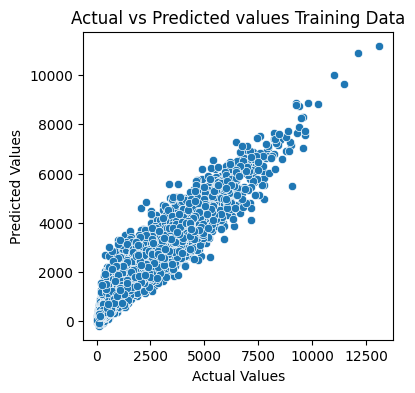

In [191]:
plt.figure(figsize=(4,4))
sns.scatterplot(x = Y_train, y = xgb_training_predictions)
plt.title("Actual vs Predicted values Training Data")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()

In [190]:
print(f"R2 Score: {round(r2_score(Y_test, xgb_test_predictions), 2)}")
print(f"MSE: {round(mean_squared_error(Y_test, xgb_test_predictions), 2)}")
print(f"MAE: {round(mean_absolute_error(Y_test, xgb_test_predictions), 2)}")

R2 Score: 0.53
MSE: 1354962.89
MAE: 819.22


visualizing the true values and prediction values

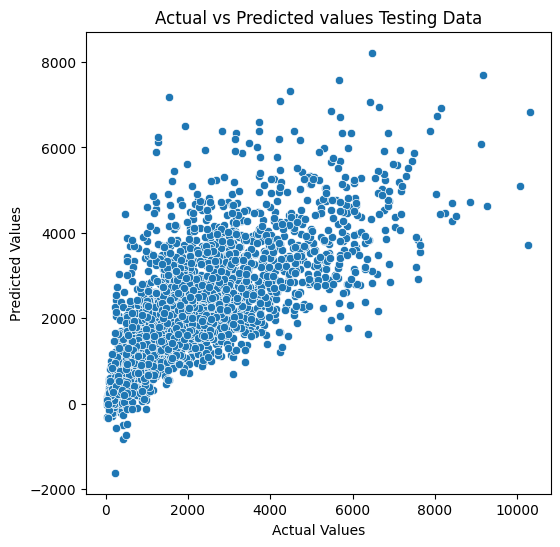

In [193]:
plt.figure(figsize=(6,6))
sns.scatterplot(x = Y_test, y = xgb_test_predictions)
plt.title("Actual vs Predicted values Testing Data")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()

Predection on Random forest

In [195]:
# prediction for training data
random_forest_training_predictions = forest_model.predict(X_train)

# prediction for test data
random_forest_test_predictions = forest_model.predict(X_test)

In [196]:
#evaluation on training
print(f"R2 Score: {round(r2_score(Y_train, random_forest_training_predictions), 2)}")
print(f"MSE: {round(mean_squared_error(Y_train, random_forest_training_predictions), 2)}")
print(f"MAE: {round(mean_absolute_error(Y_train, random_forest_training_predictions), 2)}")

R2 Score: 0.94
MSE: 183080.2
MAE: 297.28


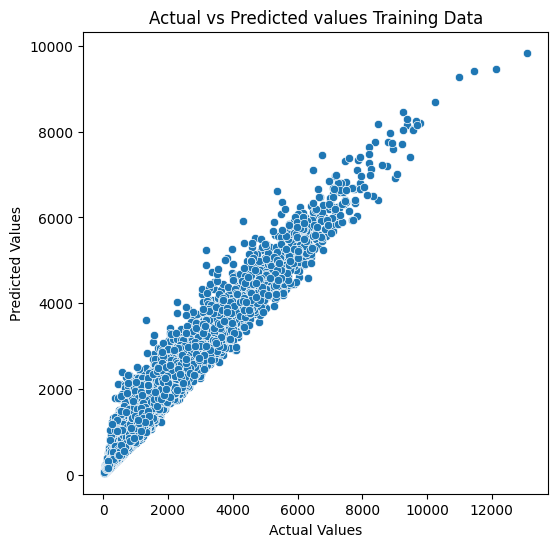

In [198]:
# visualizing the true values and prediction values

plt.figure(figsize=(6,6))
sns.scatterplot(x = Y_train, y = random_forest_training_predictions)
plt.title("Actual vs Predicted values Training Data")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()

In [199]:
print(f"R2 Score: {round(r2_score(Y_test, random_forest_test_predictions), 2)}")
print(f"MSE: {round(mean_squared_error(Y_test, random_forest_test_predictions), 2)}")
print(f"MAE: {round(mean_absolute_error(Y_test, random_forest_test_predictions), 2)}")

R2 Score: 0.57
MSE: 1262698.6
MAE: 792.81


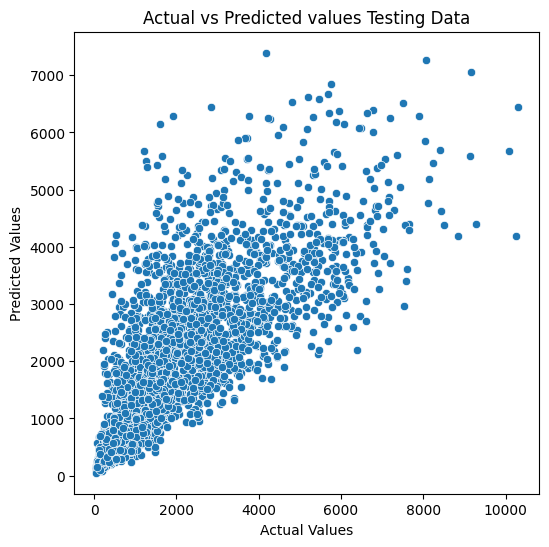

In [200]:
# visualizing the true values and prediction values

plt.figure(figsize=(6,6))
sns.scatterplot(x = Y_test, y = random_forest_test_predictions)
plt.title("Actual vs Predicted values Testing Data")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()

Summary

The scores for both the training and test data are mentioned below for XGBoost

Training data

R2 Score: 0.88

MSE: 354645.82

MAE: 429.54


Testing data

R2 Score: 0.53

MSE: 1354962.89

MAE: 819.22

The scores for both the training and test data are mentioned below for Random forest

Training Data

R2 Score: 0.94

MSE: 183080.2

MAE: 297.28

Testing Data

R2 Score: 0.57

MSE: 1262698.6

MAE: 792.81

We see that our last two models are overfitted on training data, thus the scores are not the best for test data
